# Task 4.3 Supervised Learning - Regression and hyperparameter tuning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [21]:
plt.rcParams["figure.figsize"]=(4,3)

In [5]:
brain = pd.read_csv("BloodBrain.csv")
brain

,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,...,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3,logBBB
0,12.030000,1,0,167.06700,0,156.293,76.94749,43.44619,0.00000,0.000000,...,1,1,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000,1.08
1,49.330002,0,0,92.64243,6,151.165,38.24339,25.52006,0.00000,8.619013,...,2,2,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499,-0.40
2,50.529999,1,0,295.16700,15,366.485,58.05473,124.74020,21.65084,8.619013,...,1,4,1.2562,1.2562,0.2500,26.973301,10.8567,0.000000,27.545099,0.22
3,37.389999,0,0,319.11220,15,382.552,62.23933,124.74020,13.19232,21.785640,...,1,3,1.1962,1.1962,0.3333,21.706499,11.0017,0.000000,15.131600,0.14
4,37.389999,1,0,299.65800,12,326.464,74.80064,118.04060,33.00190,0.000000,...,1,3,1.2934,1.2934,0.3333,24.206100,10.8109,0.000000,15.133300,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,32.700001,1,0,233.69200,6,250.362,51.28292,109.50990,13.19232,0.000000,...,1,3,0.8717,0.8717,0.3333,0.000000,3.1150,0.000000,49.692799,-0.02
204,3.240000,0,0,343.24290,10,292.446,40.59702,104.67720,13.19232,0.000000,...,0,1,0.0000,0.0000,0.0000,0.000000,4.6658,0.000000,0.000000,0.08
205,32.340000,1,0,234.79200,6,261.389,75.11627,86.66676,0.00000,8.619013,...,1,2,1.2276,1.2276,0.5000,0.000000,16.1765,54.358601,0.000000,0.25
206,37.299999,0,0,124.25940,0,143.206,63.98079,14.70850,0.00000,0.000000,...,1,2,0.9082,0.9082,0.5000,0.000000,0.0000,30.101400,15.944600,-0.84


In [7]:
# Zielvariable und Merkmale trennen
y = brain["logBBB"]  # Zielvariable
X = brain.drop(columns=["logBBB"])  # Prädiktoren
y

0      1.08
1     -0.40
2      0.22
3      0.14
4      0.69
       ... 
203   -0.02
204    0.08
205    0.25
206   -0.84
207   -0.25
Name: logBBB, Length: 208, dtype: float64

In [8]:
#  Trainings- und Testdaten aufteilen (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# Pipeline mit StandardScaler und RandomForest erstellen
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

In [ ]:
#NOte-AI: ChatGPT hat mir diese paprameter empfohlen
# Hyperparameter-Tuning definieren 
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__max_features': ['sqrt', 'log2']
}


In [11]:
# GridSearch mit 10-fach-CV durchführen
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:

print("Beste Parameterkombination:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Beste Parameterkombination: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__n_estimators': 200}


In [13]:
# Testdaten vorhersagen und bewerten
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"\nTestdaten - Mittlerer quadratischer Fehler (MSE): {mse:.4f}")
print(f"Testdaten - R² Score: {r2:.4f}")


Testdaten - Mittlerer quadratischer Fehler (MSE): 0.2541
Testdaten - R² Score: 0.3921


In [15]:
# Wichtigste Merkmale anzeigen
importances = best_model.named_steps['rf'].feature_importances_
feature_names = X.columns
important_features = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\nTop 10 wichtigste Merkmale:")
print(important_features.head(10))


Top 10 wichtigste Merkmale:
fnsa3                   0.043489
tpsa                    0.037999
prx                     0.034967
tcnp                    0.029594
most_positive_charge    0.028248
polar_area              0.027738
rpcg                    0.025862
tpsa.1                  0.021932
psa_npsa                0.020916
pnsa3                   0.020359
dtype: float64


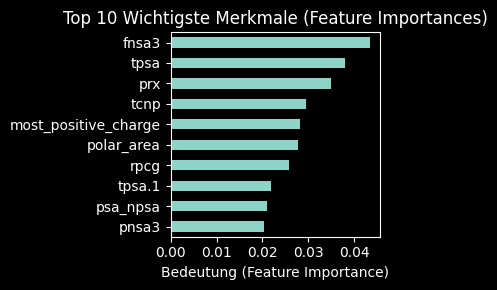

In [22]:
# Top 10 Merkmale plotten
important_features.head(10).plot(kind='barh')
plt.title("Top 10 Wichtigste Merkmale (Feature Importances)")
plt.xlabel("Bedeutung (Feature Importance)")
plt.gca().invert_yaxis()  # Höchste Wichtigkeit oben
plt.tight_layout()
plt.show()

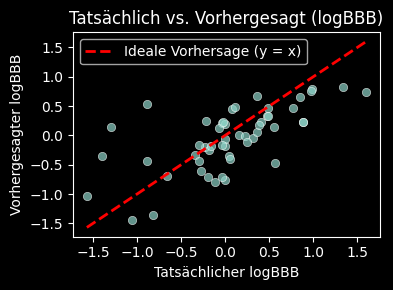

In [23]:
# Streudiagramm: Vorhergesagte vs. Tatsächliche Werte
#plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Regressionslinie hinzufügen (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', lw=2, linestyle='--', label='Ideale Vorhersage (y = x)')

plt.xlabel("Tatsächlicher logBBB")
plt.ylabel("Vorhergesagter logBBB")
plt.title("Tatsächlich vs. Vorhergesagt (logBBB)")
plt.legend()
plt.tight_layout()
plt.show()